# Machine Learning and Deep Learning - Final Project

Group Members:
* Enie Kapllani - 167828
* Katarina Gyöngyi Gyevát - 167819
* Gabriela Kirejczyk - 167333
* Alicja Budnik - 167314

In [101]:
!kaggle datasets download -d meirnizri/covid19-dataset

Dataset URL: https://www.kaggle.com/datasets/meirnizri/covid19-dataset
License(s): CC0-1.0
 64%|████████████████████████▍             | 3.00M/4.66M [00:00<00:00, 6.09MB/s]
100%|██████████████████████████████████████| 4.66M/4.66M [00:00<00:00, 7.47MB/s]


In [106]:
!unzip covid19-dataset

Archive:  covid19-dataset.zip
caution: filename not matched:  [y]


In [9]:
# importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.regularizers import l1
from keras.callbacks import EarlyStopping

import time

In [44]:
# importing the datasets
df = pd.read_csv('./Covid Data.csv')

In [45]:
# brief look at the data
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### 1 Preprocessing & EDA

In [46]:
# checking how many people are alive

invalid_date = '9999-99-99'

alive = df['DATE_DIED'].value_counts().get(invalid_date, 0)

print(f'Number of ppl alive (9999-99-99): {alive}')

Number of ppl alive (9999-99-99): 971633


In [47]:
print(f'The dataset consists of {df.shape[1]} columns and {df.shape[0]} rows')


The dataset consists of 21 columns and 1048575 rows


In [48]:
# checking for 97 values (missing values), excluding the age column
missing_values_97 = [97]

columns_to_replace = df.columns.difference(['AGE'])
df[columns_to_replace] = df[columns_to_replace].replace(missing_values_97, pd.NA)
missing_values_count = df.isna().sum()

sorted_missing_values = missing_values_count.sort_values()

print("Missing values count per column:")
print(sorted_missing_values)


Missing values count per column:
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
PNEUMONIA                    0
AGE                          0
DIABETES                     0
OTHER_DISEASE                0
COPD                         0
ASTHMA                       0
INMSUPR                      0
CARDIOVASCULAR               0
HIPERTENSION                 0
RENAL_CHRONIC                0
OBESITY                      0
TOBACCO                      0
CLASIFFICATION_FINAL         0
PREGNANT                523511
INTUBED                 848544
ICU                     848544
dtype: int64


In [49]:
# checking for 98 values (missing values), excluding the age column
missing_values_98 = [98]

columns_to_replace = df.columns.difference(['AGE'])
df[columns_to_replace] = df[columns_to_replace].replace(missing_values_98, pd.NA)

missing_values_count = df.isna().sum()
sorted_missing_values = missing_values_count.sort_values()

print("Missing values count per column:")
print(sorted_missing_values)


Missing values count per column:
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
PNEUMONIA                    0
AGE                          0
CLASIFFICATION_FINAL         0
ASTHMA                    2979
COPD                      3003
RENAL_CHRONIC             3006
OBESITY                   3032
CARDIOVASCULAR            3076
HIPERTENSION              3104
TOBACCO                   3220
DIABETES                  3338
INMSUPR                   3404
OTHER_DISEASE             5045
PREGNANT                527265
INTUBED                 848544
ICU                     848544
dtype: int64


In [50]:
# checking for 99 values (missing values), excluding the age column
missing_values_99 = [99]

columns_to_replace = df.columns.difference(['AGE'])
df[columns_to_replace] = df[columns_to_replace].replace(missing_values_99, pd.NA)

missing_values_count = df.isna().sum()
sorted_missing_values = missing_values_count.sort_values()

print("Missing values count per column:")
print(sorted_missing_values)


Missing values count per column:
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
AGE                          0
CLASIFFICATION_FINAL         0
ASTHMA                    2979
COPD                      3003
RENAL_CHRONIC             3006
OBESITY                   3032
CARDIOVASCULAR            3076
HIPERTENSION              3104
TOBACCO                   3220
DIABETES                  3338
INMSUPR                   3404
OTHER_DISEASE             5045
PNEUMONIA                16003
PREGNANT                527265
INTUBED                 855869
ICU                     856032
dtype: int64


In [51]:
#substituting missing values in pregnant column with False (2)
df['PREGNANT'] = df['PREGNANT'].fillna(2)

/tmp/ipykernel_203/3835853663.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PREGNANT'] = df['PREGNANT'].fillna(2)


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               192706 non-null   object
 6   PNEUMONIA             1032572 non-null  object
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1045237 non-null  object
 10  COPD                  1045572 non-null  object
 11  ASTHMA                1045596 non-null  object
 12  INMSUPR               1045171 non-null  object
 13  HIPERTENSION          1045471 non-null  object
 14  OTHER_DISEASE         1043530 non-null  object
 15

In [53]:
# dropping columns with too many missing values 
df = df.drop(columns=['ICU','INTUBED'])
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3


In [54]:
#removing rows with NaN values
df = df.dropna()

In [55]:
print(f'After cleaning the dataset consists of {df.shape[0]} rows')


After cleaning the dataset consists of 1025152 rows


In [56]:
# changing the 'DATE_DIED' column to be a boolean value that we
# can later predict

# first, defining a function to convert dates to boolean
def convert_date_to_boolean(date):
    if date == '9999-99-99':
        return False
    else:
        return True

# applying the function to the 'DATE_DIED' column
df['DIED'] = df['DATE_DIED'].apply(convert_date_to_boolean)
df.drop(columns=['DATE_DIED'], inplace=True) # we have to drop the date column

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,True
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,True
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,True
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,True
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,True


In [57]:
#renaming PATIENT_TYPE column with HOSPITALIZATION
df.rename(columns={'PATIENT_TYPE': 'HOSPITALIZATION'}, inplace=True)


In [58]:
columns_convert = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'PREGNANT']

# converting column types to integers
df[columns_convert] = df[columns_convert].astype(int)
df['AGE'] = df['AGE'].astype(int)

In [59]:
df[columns_convert] = df[columns_convert].replace(2, 0)

In [60]:
df['HOSPITALIZATION'] = df['HOSPITALIZATION'].replace(1,0)
df['HOSPITALIZATION'] = df['HOSPITALIZATION'].replace(2,1)

In [61]:
df['COVID_TEST_POSITIVE'] = (df['CLASIFFICATION_FINAL'] <= 3).astype(int)


In [62]:
df = df.drop('CLASIFFICATION_FINAL', axis = 1)

In [63]:
print(df.dtypes)

USMER                  int64
MEDICAL_UNIT           int64
SEX                    int64
HOSPITALIZATION        int64
PNEUMONIA              int64
AGE                    int64
PREGNANT               int64
DIABETES               int64
COPD                   int64
ASTHMA                 int64
INMSUPR                int64
HIPERTENSION           int64
OTHER_DISEASE          int64
CARDIOVASCULAR         int64
OBESITY                int64
RENAL_CHRONIC          int64
TOBACCO                int64
DIED                    bool
COVID_TEST_POSITIVE    int64
dtype: object


In [64]:
df.head()

,USMER,MEDICAL_UNIT,SEX,HOSPITALIZATION,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DIED,COVID_TEST_POSITIVE
0,2,1,1,0,1,65,0,0,0,0,0,1,0,0,0,0,0,True,1
1,2,1,2,0,1,72,0,0,0,0,0,1,0,0,1,1,0,True,0
2,2,1,2,1,0,55,0,1,0,0,0,0,0,0,0,0,0,True,1
3,2,1,1,0,0,53,0,0,0,0,0,0,0,0,0,0,0,True,0
4,2,1,2,0,0,68,0,1,0,0,0,1,0,0,0,0,0,True,1


### 2 Visualizing the data

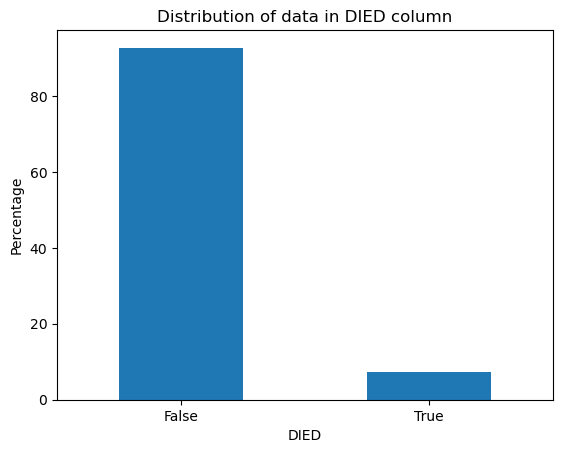

In [65]:
# distribution of true (patient died) and false (alive) in DIED column

(df['DIED'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Distribution of data in DIED column')
plt.xlabel('DIED')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()

In [66]:
# perentage of deaths and alive in died column
died_counts = df['DIED'].value_counts()
died_percentage = died_counts / died_counts.sum() * 100

print("Percentages of true and false in DIED column:")
print(died_percentage)

Percentages of true and false in DIED column:
DIED
False    92.71191
True      7.28809
Name: count, dtype: float64


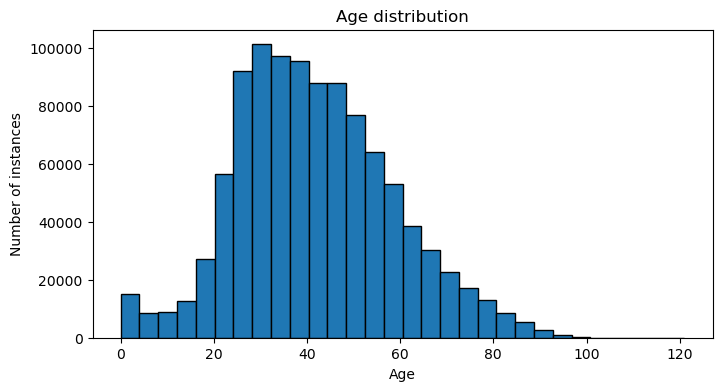

In [67]:
plt.figure(figsize=(8, 4))
df['AGE'].hist(bins=30, edgecolor='black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of instances')
plt.grid(False)
plt.show()

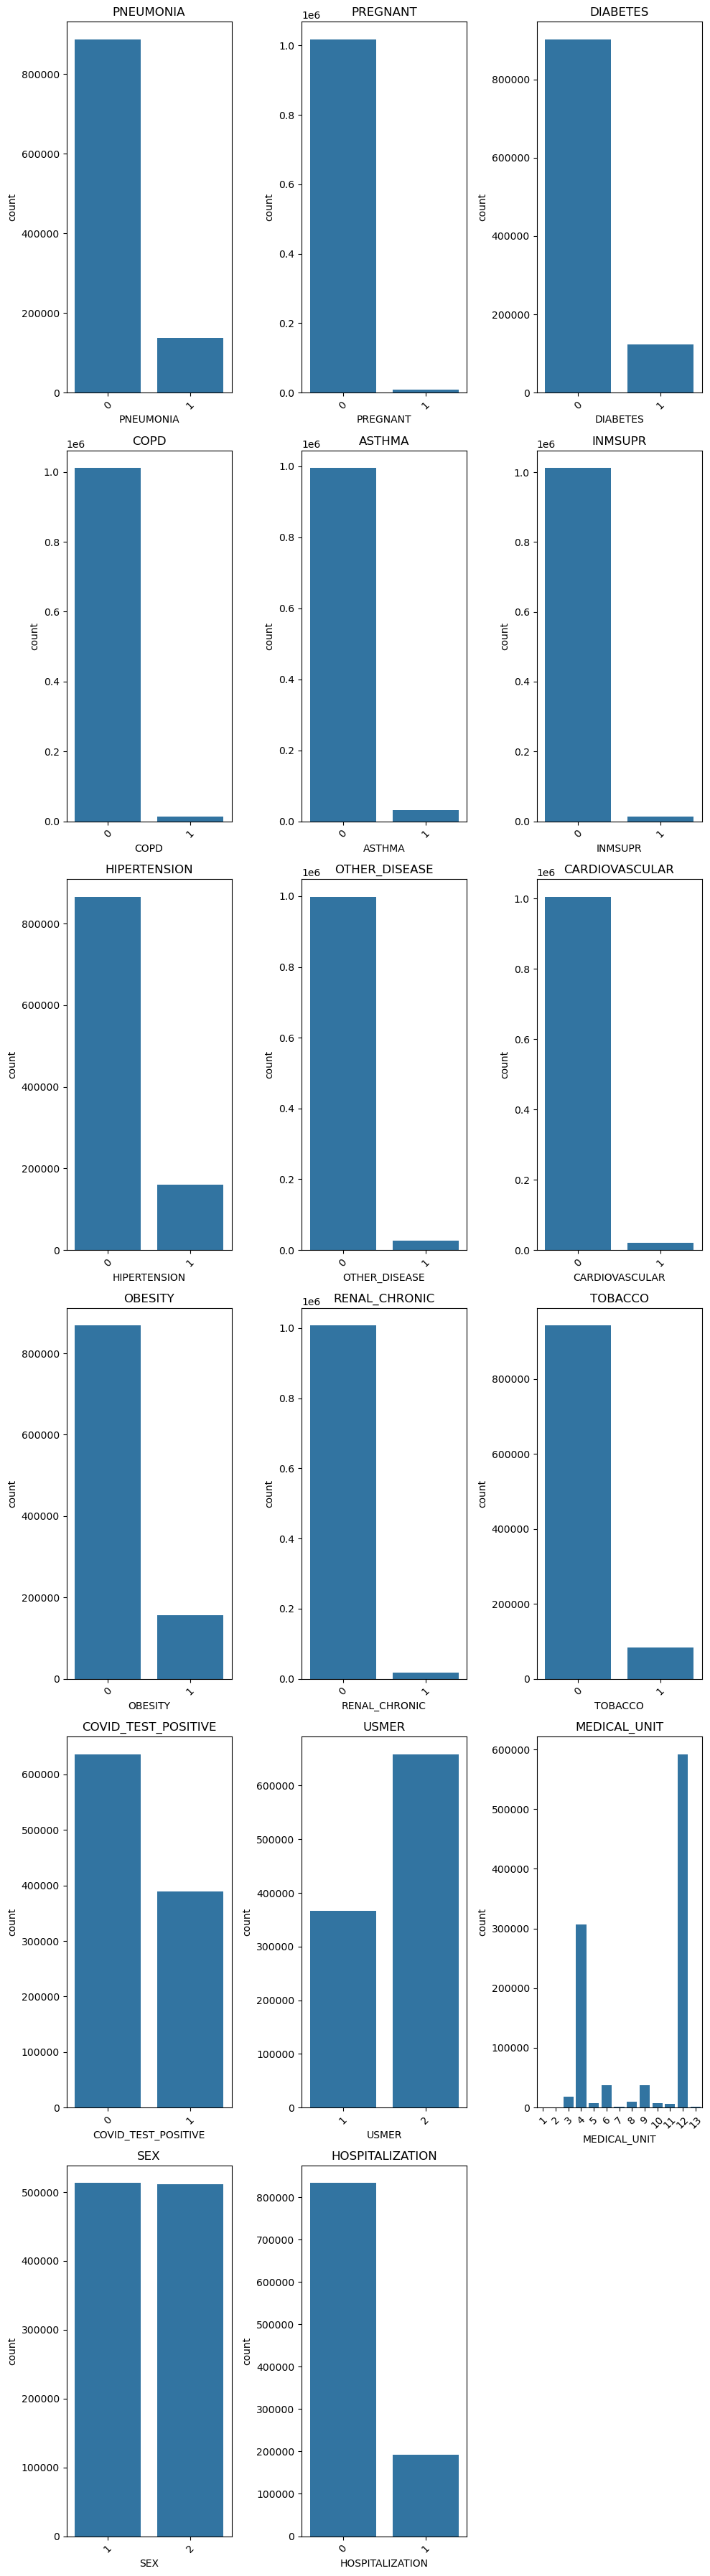

In [68]:
# bar charts with distribution of valued for other columns
columns = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
                       'COVID_TEST_POSITIVE', 'USMER', 'MEDICAL_UNIT', 'SEX', 'HOSPITALIZATION']

num_columns = 3
num_rows = len(columns) // num_columns + (len(columns) % num_columns > 0)

plt.figure(figsize=(10, num_rows * 6))
for index, column in enumerate(columns, 1):
    plt.subplot(num_rows, num_columns, index)
    sns.countplot(x=column, data=df)
    plt.title(f'{column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

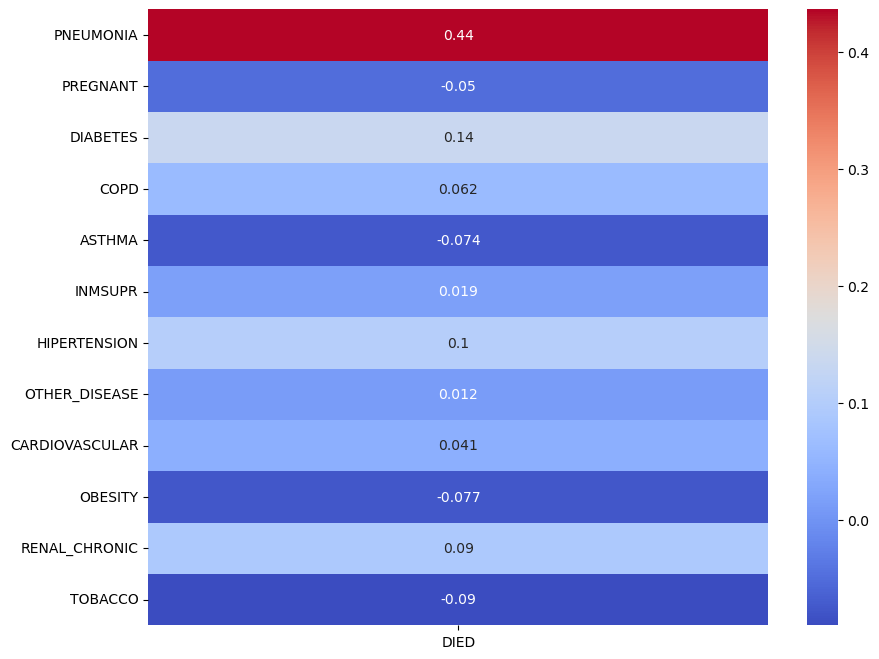

In [69]:
# correlation between med conditions and died column
columns_corr = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'DIED']

df_med_con = df[(df[columns_corr[:-1]] == 1).any(axis=1)]
corr_matrix = df_med_con[columns_corr].corr()
died_corr = corr_matrix['DIED'].drop('DIED')

vmin = died_corr.min()
vmax = died_corr.max()

plt.figure(figsize=(10, 8))
sns.heatmap(died_corr.to_frame(), annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, cbar=True)
plt.show()

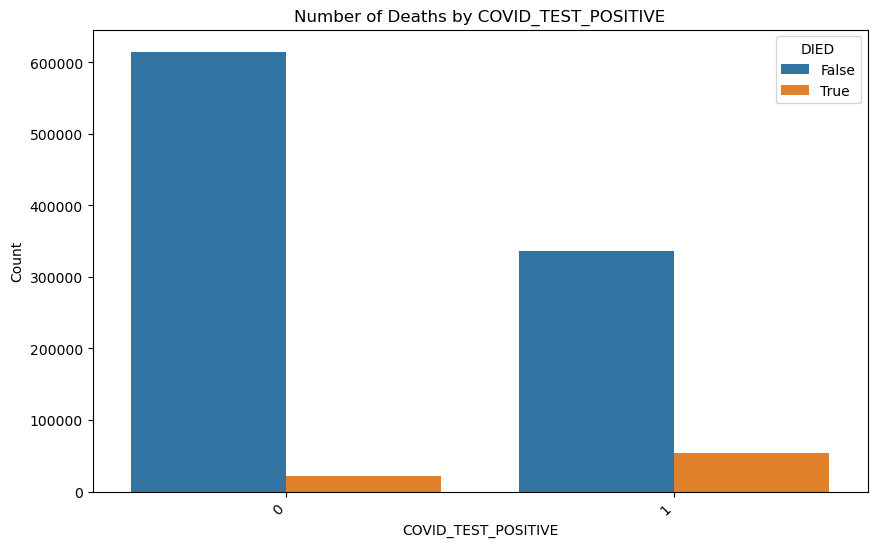

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='COVID_TEST_POSITIVE', hue='DIED', data=df)
plt.xlabel('COVID_TEST_POSITIVE')
plt.ylabel('Count')
plt.title('Number of Deaths by COVID_TEST_POSITIVE')
plt.xticks(rotation=45, ha='right')
plt.legend(title='DIED', labels=['False', 'True'])
plt.show()

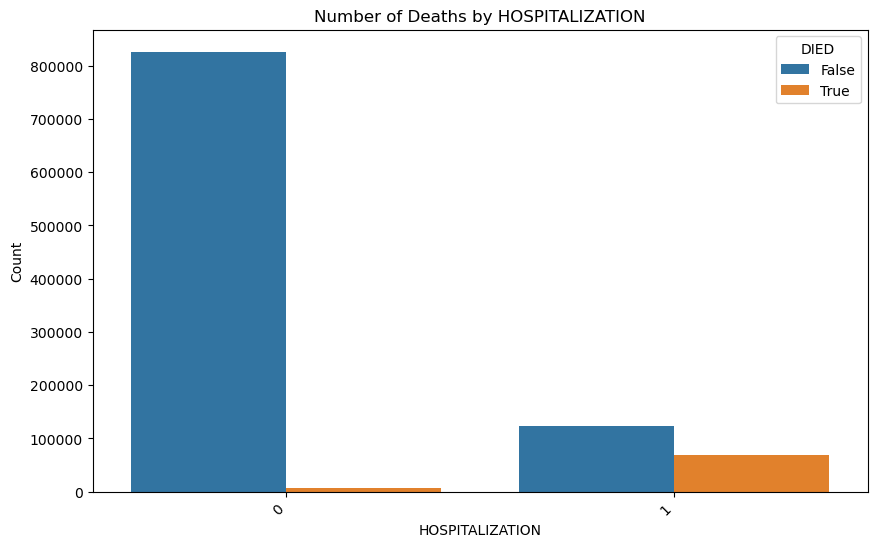

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HOSPITALIZATION', hue='DIED', data=df)
plt.xlabel('HOSPITALIZATION')
plt.ylabel('Count')
plt.title('Number of Deaths by HOSPITALIZATION')
plt.xticks(rotation=45, ha='right')
plt.legend(title='DIED', labels=['False', 'True'])
plt.show()

/tmp/ipykernel_203/978932802.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_died_counts = df[df['DIED']].groupby('Age_Group').size().fillna(0).astype(int)


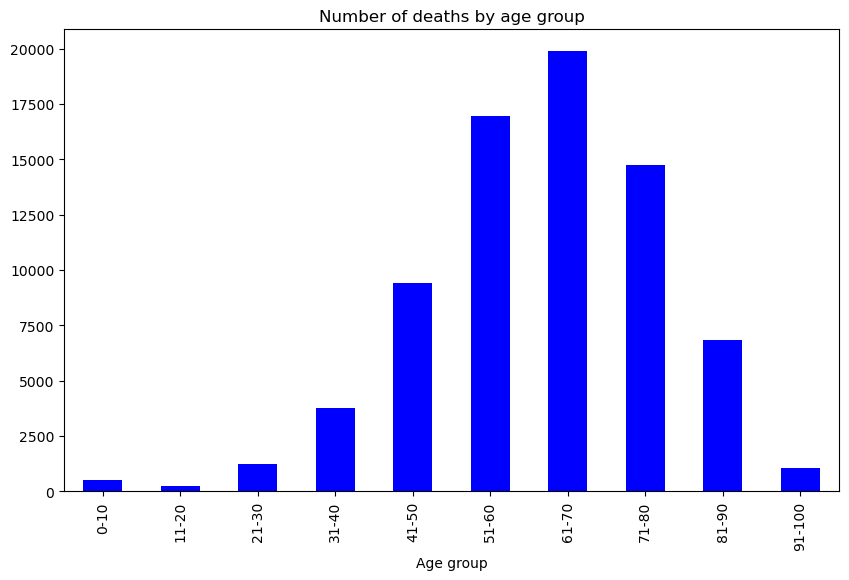

In [72]:
# number of deaths in age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
age_died_counts = df[df['DIED']].groupby('Age_Group').size().fillna(0).astype(int)

plt.figure(figsize=(10, 6))
age_died_counts.plot(kind='bar', color='blue')
plt.xlabel('Age group')
plt.title('Number of deaths by age group')
plt.show()

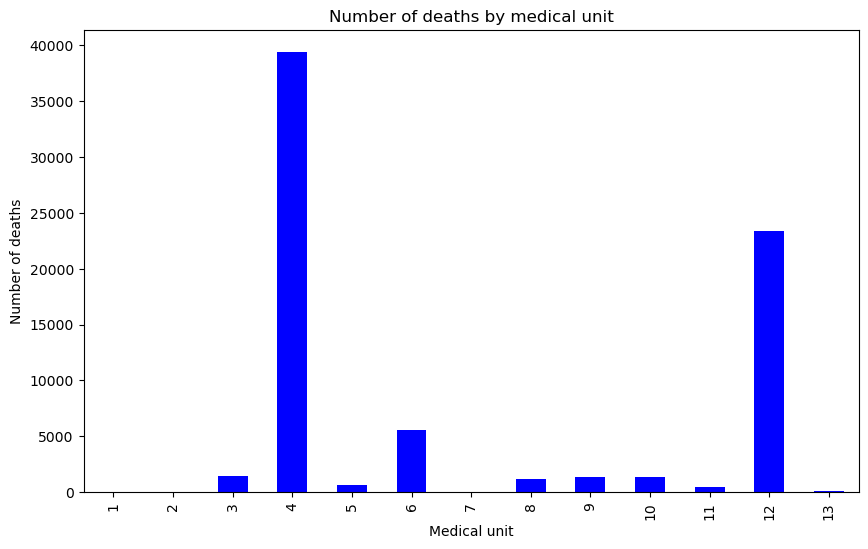

In [73]:
# number of deaths in each medical unit
medical_died_counts = df[df['DIED']].groupby('MEDICAL_UNIT').size().fillna(0).astype(int)

plt.figure(figsize=(10, 6))
medical_died_counts.plot(kind='bar', color='blue')
plt.xlabel('Medical unit')
plt.ylabel('Number of deaths')
plt.title('Number of deaths by medical unit')
plt.show()

<Axes: xlabel='DIED', ylabel='AGE'>

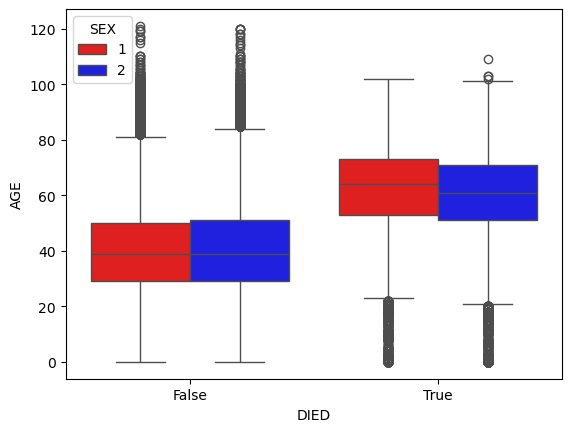

In [74]:
# Age distribution by DIED and SEX columns
sns.boxplot(x="DIED", y="AGE", hue ="SEX", data=df, palette=['red', 'blue'])

# Logistic Regression

In [108]:
df['DIED'] = df['DIED'].astype(int)

In [109]:
scaler = StandardScaler()

# fit and transform AGE column
df['AGE'] = scaler.fit_transform(df[['AGE']])

In [110]:
#define features and label
y = df.loc[:, "DIED"]
X = df.drop(["DIED", "Age_Group"], axis=1)

In [111]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
start_time = time.time()

# Logistic Regression model
model1 = LogisticRegression(max_iter=1000)

# train the model on the training data
model1.fit(X_train, y_train)

# predict on the testing data
y_pred1 = model1.predict(X_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Elapsed time (seconds): 3.4457406997680664


In [113]:
#assess the model
accuracy_lr = accuracy_score(y_test, y_pred1)
precision_lr = precision_score(y_test, y_pred1)
recall_lr = recall_score(y_test, y_pred1)
f1_lr = f1_score(y_test, y_pred1)
conf_matrix_lr = confusion_matrix(y_test, y_pred1)
report_lr = classification_report(y_test, y_pred1)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", report_lr)

Accuracy: 0.9381508162180353
Precision: 0.5926682134570765
Recall: 0.43507289821501566
F1 Score: 0.5017876085333752
Confusion Matrix:
 [[185964   4389]
 [  8292   6386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    190353
           1       0.59      0.44      0.50     14678

    accuracy                           0.94    205031
   macro avg       0.77      0.71      0.73    205031
weighted avg       0.93      0.94      0.93    205031



In [114]:
start_time = time.time()

# Logistic Regression with L1 regularization and SMOTE

pipeline = Pipeline([
    ('smote', SMOTE()),            # Apply SMOTE for class imbalance
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear'))  # Logistic Regression with L1 regularization
])

# training the model on the training data
pipeline.fit(X_train, y_train)

# predicting on the testing data
y_pred_smote_l1 = pipeline.predict(X_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Elapsed time (seconds): 17.337743043899536


In [115]:
#assess the model
accuracy_lr_smote_l1 = accuracy_score(y_test, y_pred_smote_l1)
precision_lr_smote_l1 = precision_score(y_test, y_pred_smote_l1)
recall_lr_smote_l1 = recall_score(y_test, y_pred_smote_l1)
f1_lr_smote_l1 = f1_score(y_test, y_pred_smote_l1)
conf_matrix_lr_smote_l1 = confusion_matrix(y_test, y_pred_smote_l1)
report_lr_smote_l1 = classification_report(y_test, y_pred_smote_l1)

print("Accuracy:", accuracy_lr_smote_l1)
print("Precision:", precision_lr_smote_l1)
print("Recall:", recall_lr_smote_l1)
print("F1 Score:", f1_lr_smote_l1)
print("Confusion Matrix:\n", conf_matrix_lr_smote_l1)
print("Classification Report:\n", report_lr_smote_l1)

Accuracy: 0.8932795528481059
Precision: 0.3945974421259036
Recall: 0.9185856383703502
F1 Score: 0.5520502794439781
Confusion Matrix:
 [[169667  20686]
 [  1195  13483]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94    190353
           1       0.39      0.92      0.55     14678

    accuracy                           0.89    205031
   macro avg       0.69      0.90      0.75    205031
weighted avg       0.95      0.89      0.91    205031



In [116]:
# Logistic Regression with SMOTE
start_time = time.time()

pipeline2 = Pipeline([
    ('smote', SMOTE()),            # Apply SMOTE for class imbalance
    ('logreg', LogisticRegression(max_iter=1000)) 
])

# training the model on the training data
pipeline2.fit(X_train, y_train)

# predicting on the testing data
y_pred_smote = pipeline2.predict(X_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Elapsed time (seconds): 17.53922176361084


In [117]:
#assess the model
accuracy_lr_smote = accuracy_score(y_test, y_pred_smote)
precision_lr_smote = precision_score(y_test, y_pred_smote)
f1_lr_smote = f1_score(y_test, y_pred_smote)
recall_lr_smote = recall_score(y_test, y_pred_smote)
conf_matrix_lr_smote = confusion_matrix(y_test, y_pred_smote)
report_lr_smote = classification_report(y_test, y_pred_smote)

print("Accuracy:", accuracy_lr_smote)
print("Precision:", precision_lr_smote)
print("Recall:", recall_lr_smote)
print("F1 Score:", f1_lr_smote)
print("Confusion Matrix:\n", conf_matrix_lr_smote)
print("Classification Report:\n", report_lr_smote)

Accuracy: 0.8933039394042852
Precision: 0.39466752516974946
Recall: 0.9187218967161739
F1 Score: 0.5521434713180199
Confusion Matrix:
 [[169670  20683]
 [  1193  13485]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94    190353
           1       0.39      0.92      0.55     14678

    accuracy                           0.89    205031
   macro avg       0.69      0.91      0.75    205031
weighted avg       0.95      0.89      0.91    205031



# Random Forest

In [48]:
start_time = time.time()

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring=['accuracy', 'precision', 'recall'], refit='accuracy', n_jobs=-1)

# fitting the grid search to the data
print("Grid search is running...")
grid_search.fit(X_train, y_train)
print("Grid search completed.")

# getting the best parameter
best_n_estimators = grid_search.best_params_['n_estimators']

print("Best parameter: ", best_n_estimators)

elapsed_time = time.time() - start_time
print("Elapsed time (seconds):", elapsed_time)

Grid search is running...
Grid search completed.
Best parameter:  300
Elapsed time (seconds): 807.5334000587463


In [118]:
# running the model with the best parameter obtained from GridSearch
start_time = time.time()

model2= RandomForestClassifier(n_estimators=300, max_leaf_nodes=16, n_jobs=-1) 
model2.fit(X_train, y_train)
y_pred_rf = model2.predict(X_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf) 
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf) 
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", report_rf)

Elapsed time (seconds): 9.81865382194519
Accuracy: 0.9364486345967196
Precision: 0.6968466316292403
Recall: 0.19873279738383975
F1 Score: 0.3092663273960984
Confusion Matrix:
 [[189084   1269]
 [ 11761   2917]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97    190353
           1       0.70      0.20      0.31     14678

    accuracy                           0.94    205031
   macro avg       0.82      0.60      0.64    205031
weighted avg       0.92      0.94      0.92    205031



In [92]:
start_time = time.time()

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Elapsed time (seconds): 2.636409282684326


In [119]:
#running Random Forest with SMOTE

start_time = time.time()

model3= RandomForestClassifier(n_estimators=300, max_leaf_nodes=16, n_jobs=-1) 
model3.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = model3.predict(X_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Elapsed time (seconds): 13.036360025405884


In [120]:
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
report_rf_smote = classification_report(y_test, y_pred_rf_smote)

print("Accuracy:", accuracy_rf_smote)
print("Precision:", precision_rf_smote)
print("Recall:", recall_rf_smote)
print("F1 Score:", f1_rf_smote)
print("Confusion Matrix:\n", conf_matrix_rf_smote)
print("Classification Report:\n", report_rf_smote)

Accuracy: 0.874662855860821
Precision: 0.35871070311298014
Recall: 0.9530589998637417
F1 Score: 0.521238542365303
Confusion Matrix:
 [[165344  25009]
 [   689  13989]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    190353
           1       0.36      0.95      0.52     14678

    accuracy                           0.87    205031
   macro avg       0.68      0.91      0.72    205031
weighted avg       0.95      0.87      0.90    205031



In [53]:
# getting feature importances in a sorted order

importances = model2.feature_importances_
indices = np.argsort(importances)[::-1]

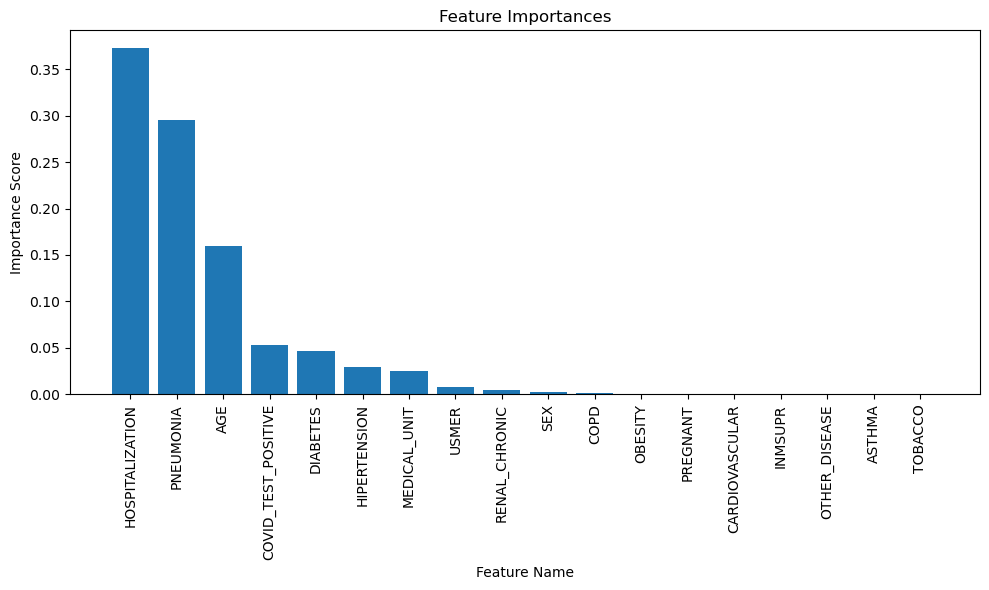

In [54]:
# plotting feature importances
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)  # Use feature names and rotate labels
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [122]:
# subsetting the dataset with selected features to run the model
X_selected = df.loc[:,['HOSPITALIZATION', 'PNEUMONIA', 'AGE', 'COVID_TEST_POSITIVE', 'HIPERTENSION', 'DIABETES', 'MEDICAL_UNIT']]



In [123]:
#running the model on selected features
start_time = time.time()

X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_selected, y, test_size=0.2, random_state=42)
smote = SMOTE()
X_train_smote_subset, y_train_smote_subset = smote.fit_resample(X_train_subset, y_train_subset)
model3.fit(X_train_smote_subset, y_train_smote_subset)
y_pred_rf_subset = model3.predict(X_test_subset)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Elapsed time (seconds): 16.764430284500122


In [124]:
accuracy_subset = accuracy_score(y_test, y_pred_rf_subset)
precision_subset = precision_score(y_test, y_pred_rf_subset)
recall_subset = recall_score(y_test, y_pred_rf_subset)
f1_subset = f1_score(y_test, y_pred_rf_subset)
conf_matrix_subset = confusion_matrix(y_test, y_pred_rf_subset)
report_subset = classification_report(y_test, y_pred_rf_subset)

print("Accuracy:", accuracy_subset)
print("Precision:", precision_subset)
print("Recall:", recall_subset)
print("F1 Score:", f1_subset)
print("Confusion Matrix:\n", conf_matrix_subset)
print("Classification Report:\n", report_subset)

Accuracy: 0.872936287683326
Precision: 0.35563791440320863
Recall: 0.9544897124948903
F1 Score: 0.5181979582778518
Confusion Matrix:
 [[164969  25384]
 [   668  14010]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    190353
           1       0.36      0.95      0.52     14678

    accuracy                           0.87    205031
   macro avg       0.68      0.91      0.72    205031
weighted avg       0.95      0.87      0.90    205031



# FNN

In [58]:
import kerastuner as kt
from keras.models import Sequential
from keras.layers import Dense

start_time = time.time()

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=16, max_value=512, step=32), activation=hp.Choice('activation_1', ['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=512, step=32), activation=hp.Choice('activation_2', ['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'precision','recall','f1_score'])
    return model

k_tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='keras_tuner')

k_tuner.search_space_summary()

# performing hyperparameter search
k_tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# getting the best hyperparameters
best_hps = k_tuner.get_best_hyperparameters(num_trials=1)[0]

# running the model with best hyperparameters
model_nn = k_tuner.hypermodel.build(best_hps)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Trial 30 Complete [00h 10m 01s]
val_accuracy: 0.9405456781387329

Best val_accuracy So Far: 0.9408870339393616
Total elapsed time: 01h 51m 49s
Elapsed time (seconds): 6709.320864677429


In [59]:
#print the best hyperparameters
print("Best Hyperparameters:")
print(best_hps.values)

Best Hyperparameters:
{'units_1': 496, 'activation_1': 'relu', 'units_2': 112, 'activation_2': 'sigmoid', 'optimizer': 'adam', 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}


In [60]:
#running the model with basic parameters, smote and regularization

start_time = time.time()

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model4 = Sequential()
model4.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(BatchNormalization()) #Batch Normalization
model4.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01))) #L1 Regularization
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'f1_score'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# fitting our model
fit = model4.fit(X_train_smote, y_train_smote, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])
y_pred_nn = model4.predict(X_test)

loss_nn, accuracy_nn, precision_nn, recall_nn, f1_score_nn = model4.evaluate(X_test, y_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 242s 2ms/step - accuracy: 0.8968 - f1_score: 0.5456 - loss: 0.3436 - precision: 0.8232 - recall: 0.9231 - val_accuracy: 0.9444 - val_f1_score: 1.0000 - val_loss: 0.3302 - val_precision: 1.0000 - val_recall: 0.9444
Epoch 2/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 239s 2ms/step - accuracy: 0.9000 - f1_score: 0.5456 - loss: 0.2782 - precision: 0.8249 - recall: 0.9311 - val_accuracy: 0.9030 - val_f1_score: 1.0000 - val_loss: 0.4005 - val_precision: 1.0000 - val_recall: 0.9030
Epoch 3/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 242s 2ms/step - accuracy: 0.9007 - f1_score: 0.5450 - loss: 0.2769 - precision: 0.8267 - recall: 0.9298 - val_accuracy: 0.9458 - val_f1_score: 1.0000 - val_loss: 0.3237 - val_precision: 1.0000 - val_recall: 0.9458
Epoch 4/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 240s 2ms/step - accuracy: 0.9011 - f1_score: 0.5451 - loss: 0.2755 - precision: 0.8273 - recall: 0.9303 - val_accuracy: 0.9402 - val_f1_score: 1.0000 - val_loss: 0.3150 - val

In [61]:
print("Test Accuracy:", accuracy_nn)
print("Test Loss:", loss_nn)
print("Test Precision:", precision_nn)
print("Test Recall:", recall_nn)
print("Test F1_score:", f1_score_nn)


Test Accuracy: 0.8832128047943115
Test Loss: 0.24898675084114075
Test Precision: 0.37392866611480713
Test Recall: 0.936299204826355
Test F1_score: 0.13361306488513947


In [88]:
#running model with tuned parameters with smote

start_time = time.time()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

fit2 = model_nn.fit(X_train_smote, y_train_smote, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

y_pred_nn2 = model_nn.predict(X_test)

loss_nn2, accuracy_nn2, precision_nn2, recall_nn2, f1_score_nn2 = model_nn.evaluate(X_test, y_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Epoch 1/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 272s 2ms/step - accuracy: 0.9079 - f1_score: 0.5454 - loss: 0.2342 - precision: 0.8394 - recall: 0.9329 - val_accuracy: 0.9332 - val_f1_score: 1.0000 - val_loss: 0.2697 - val_precision: 1.0000 - val_recall: 0.9332
Epoch 2/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 271s 2ms/step - accuracy: 0.9078 - f1_score: 0.5454 - loss: 0.2343 - precision: 0.8399 - recall: 0.9318 - val_accuracy: 0.9241 - val_f1_score: 1.0000 - val_loss: 0.3053 - val_precision: 1.0000 - val_recall: 0.9241
Epoch 3/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 270s 2ms/step - accuracy: 0.9075 - f1_score: 0.5463 - loss: 0.2350 - precision: 0.8392 - recall: 0.9326 - val_accuracy: 0.9216 - val_f1_score: 1.0000 - val_loss: 0.3133 - val_precision: 1.0000 - val_recall: 0.9216
Epoch 4/50
121614/121614 ━━━━━━━━━━━━━━━━━━━━ 269s 2ms/step - accuracy: 0.9080 - f1_score: 0.5453 - loss: 0.2345 - precision: 0.8400 - recall: 0.9322 - val_accuracy: 0.9406 - val_f1_score: 1.0000 - val_loss: 0.2687 - val

In [89]:
print("Test Loss:", loss_nn2)
print("Test Precision:", precision_nn2)
print("Test Accuracy:", accuracy_nn2)
print("Test Recall:", recall_nn2)
print("Test F1_score:", f1_score_nn2)


Test Loss: 0.22186602652072906
Test Precision: 0.3973331153392792
Test Accuracy: 0.8939380049705505
Test Recall: 0.9318026900291443
Test F1_score: 0.13361306488513947


In [90]:
start_time = time.time()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

fit3 = model_nn.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

y_pred_nn3 = model_nn.predict(X_test)

loss_nn3, accuracy_nn3, precision_nn3, recall_nn3, f1_score_nn3 = model_nn.evaluate(X_test, y_test)

elapsed_time = time.time() - start_time

print("Elapsed time (seconds):", elapsed_time)

Epoch 1/50
65610/65610 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.9385 - f1_score: 0.1371 - loss: 0.1277 - precision: 0.6099 - recall: 0.4584 - val_accuracy: 0.9399 - val_f1_score: 0.1351 - val_loss: 0.1264 - val_precision: 0.6281 - val_recall: 0.4167
Epoch 2/50
65610/65610 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.9387 - f1_score: 0.1374 - loss: 0.1275 - precision: 0.6188 - recall: 0.4395 - val_accuracy: 0.9398 - val_f1_score: 0.1351 - val_loss: 0.1273 - val_precision: 0.6104 - val_recall: 0.4682
Epoch 3/50
65610/65610 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - accuracy: 0.9387 - f1_score: 0.1369 - loss: 0.1282 - precision: 0.6179 - recall: 0.4347 - val_accuracy: 0.9403 - val_f1_score: 0.1351 - val_loss: 0.1289 - val_precision: 0.6391 - val_recall: 0.4037
Epoch 4/50
65610/65610 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.9386 - f1_score: 0.1365 - loss: 0.1278 - precision: 0.6162 - recall: 0.4303 - val_accuracy: 0.9400 - val_f1_score: 0.1351 - val_loss: 0.1286 - val_precisi

In [91]:
print("Test Loss:", loss_nn3)
print("Test Precision:", precision_nn3)
print("Test Accuracy:", accuracy_nn3)
print("Test Recall:", recall_nn3)
print("Test F1_score:", f1_score_nn3)


Test Loss: 0.1257399618625641
Test Precision: 0.6218573451042175
Test Accuracy: 0.9399944543838501
Test Recall: 0.41286277770996094
Test F1_score: 0.13361306488513947


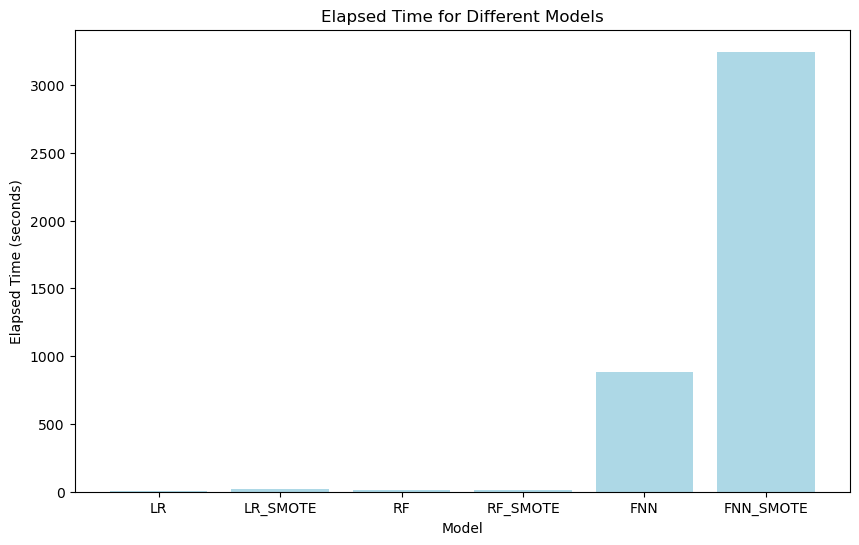

In [98]:
# time complexity graph

# assigning values to elapsed times
elapsed_times = {
    'LR': 3.36,
    'LR_SMOTE': 19.01,
    'RF': 9.74,
    'RF_SMOTE': 15.35,
    'FNN': 885.12,
    'FNN_SMOTE': 3244.71
}

labels = list(elapsed_times.keys())
values = list(elapsed_times.values())

# a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['lightblue'])

plt.xlabel('Model')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Elapsed Time for Different Models')

plt.show()


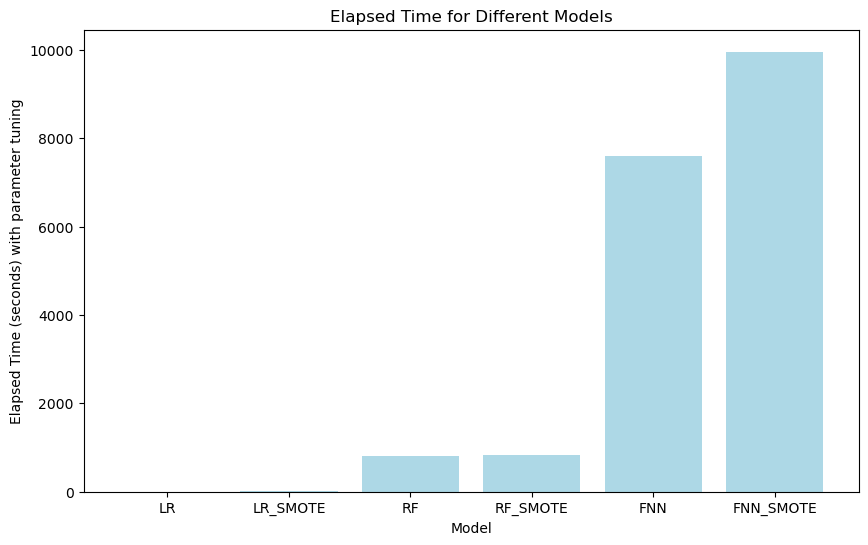

In [99]:
# time complexity graph

# assigning values to elapsed times
elapsed_times = {
    'LR': 3.36,
    'LR_SMOTE': 19.01,
    'RF': 9.74+807.53,
    'RF_SMOTE': 15.35+807.53,
    'FNN': 885.12+6709.32,
    'FNN_SMOTE': 3244.71+6709.32
}

labels = list(elapsed_times.keys())
values = list(elapsed_times.values())

# a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['lightblue'])

plt.xlabel('Model')
plt.ylabel('Elapsed Time (seconds) with parameter tuning')
plt.title('Elapsed Time for Different Models')

plt.show()